In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.image import imread
import matplotlib.image as mpimg
import os
import random
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout,  Flatten, Dense,MaxPool2D
 #for explainable
from skimage.segmentation import mark_boundaries
import lime
from lime import lime_image

In [110]:
Data_path="/content/drive/MyDrive/COVID-19 Chest Xray"
train_path="/content/drive/MyDrive/COVID-19 Chest Xray/train data"
test_path="/content/drive/MyDrive/COVID-19 Chest Xray/test data"

In [111]:
from imutils import paths
list(paths.list_images(train_path))

['/content/drive/MyDrive/COVID-19 Chest Xray/train data/COVID/010.png',
 '/content/drive/MyDrive/COVID-19 Chest Xray/train data/COVID/019.png',
 '/content/drive/MyDrive/COVID-19 Chest Xray/train data/COVID/012.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/train data/COVID/021.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/train data/COVID/020.jpg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/train data/COVID/022.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/train data/COVID/015.jpg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/train data/COVID/02.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/train data/COVID/01.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/train data/COVID/024.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/train data/COVID/042.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/train data/COVID/031.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/train data/COVID/051.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/train data/C

In [112]:
from imutils import paths
list(paths.list_images(test_path))

['/content/drive/MyDrive/COVID-19 Chest Xray/test data/covid/0106.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/test data/covid/0111.jpg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/test data/covid/0105.png',
 '/content/drive/MyDrive/COVID-19 Chest Xray/test data/covid/0102.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/test data/covid/0100.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/test data/covid/0108.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/test data/covid/0118.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/test data/covid/0119.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/test data/covid/auntminnie-2020_01_31_20_24_2322_2020_01_31_x-ray_coronavirus_US.jpg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/test data/covid/098.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/test data/covid/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/test data/covid/COVID-00037.jpg',
 

In [113]:
from imutils import paths
import random
SEED=10

imagePaths_train = sorted(list(paths.list_images(train_path)))
random.seed(SEED)
random.shuffle(imagePaths_train)
imagePaths_train[:5]

['/content/drive/MyDrive/COVID-19 Chest Xray/train data/COVID/COVID-00014.jpg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/train data/COVID/052.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/train data/Viral Pneumonia/038.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/train data/Normal/064.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/train data/Viral Pneumonia/081.jpeg']

In [114]:
from imutils import paths
import random
SEED=10

imagePaths_test = sorted(list(paths.list_images(test_path)))
random.seed(SEED)
random.shuffle(imagePaths_test)
imagePaths_test[:5]

['/content/drive/MyDrive/COVID-19 Chest Xray/test data/normal/0121.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/test data/covid/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/test data/covid/0106.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/test data/viral Pneumonia/0110.jpeg',
 '/content/drive/MyDrive/COVID-19 Chest Xray/test data/normal/0111.jpeg']

In [115]:
os.listdir(train_path)

['COVID', 'Normal', 'Viral Pneumonia']

In [116]:
# Observation of an image sample for each category of X-ray

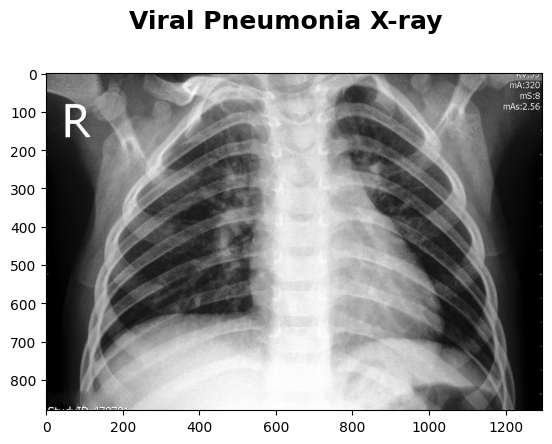

In [117]:
pneumonia_sample = imread("/content/drive/MyDrive/COVID-19 Chest Xray/train data/Viral Pneumonia/038.jpeg")
plt.imshow(pneumonia_sample)
plt.suptitle('Viral Pneumonia X-ray', fontsize=18, weight='bold');

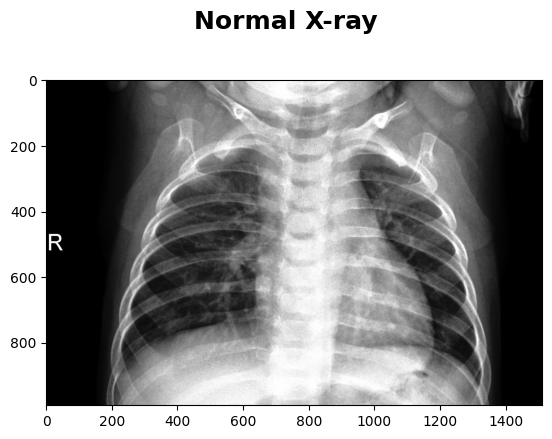

In [118]:
normal_sample = imread("/content/drive/MyDrive/COVID-19 Chest Xray/train data/Normal/064.jpeg")
plt.imshow(normal_sample)
plt.suptitle('Normal X-ray', fontsize=18, weight='bold');

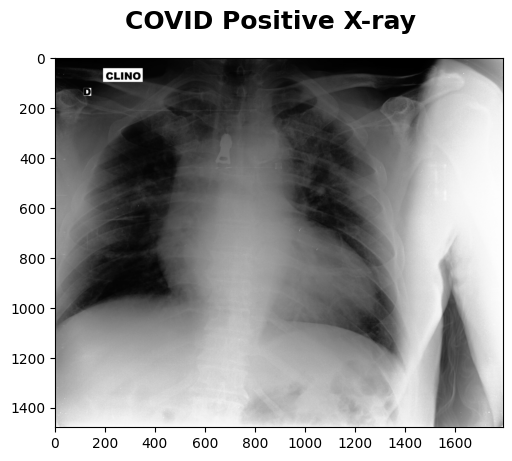

In [119]:
covid_sample = imread("/content/drive/MyDrive/COVID-19 Chest Xray/train data/COVID/052.jpeg")
plt.imshow(covid_sample)
plt.suptitle('COVID Positive X-ray', fontsize=18, weight='bold');

In [120]:
# Data Augmantion

In [121]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range=15,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [122]:
# Built CNN

In [123]:
image_size = (224,224,3)

model = Sequential()
model.add(Conv2D(64,(3,3),activation = "relu", input_shape = image_size))
model.add(MaxPool2D())

model.add(Conv2D( 128, (3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D( 256,(3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D( 512,(3,3), activation = "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.15))

model.add(Dense(3, activation = "softmax"))


model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "sequential"


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 128)      0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 54, 54, 128)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 256)      

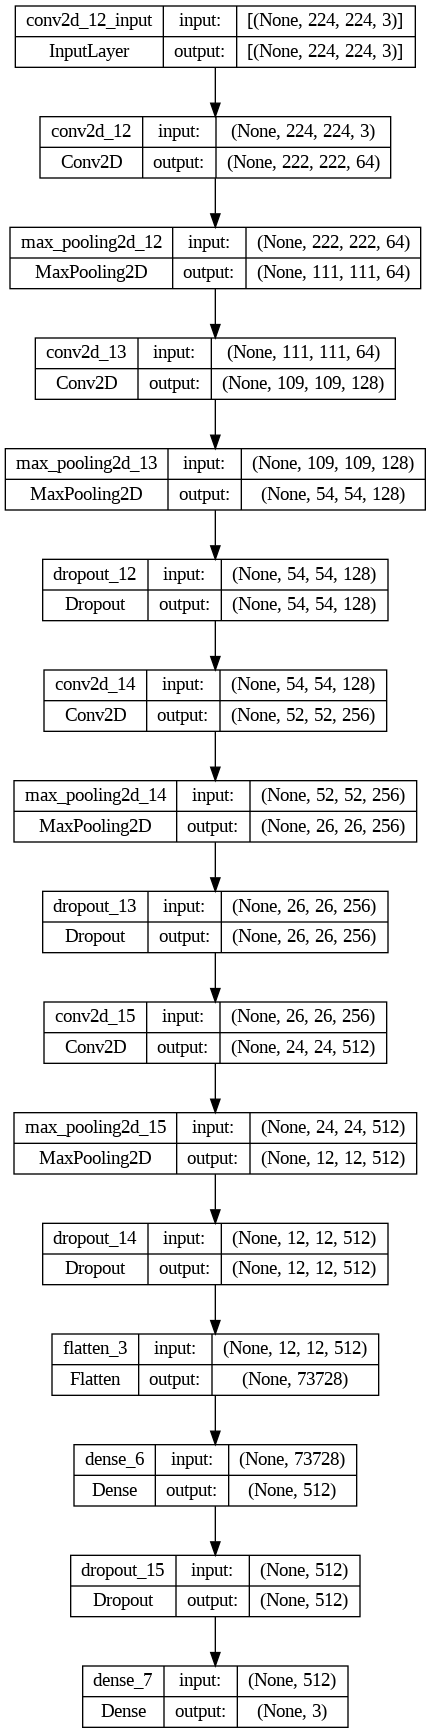

In [124]:
# plot model layer
keras.utils.plot_model(model,show_shapes=True)

In [125]:
# model traning

In [126]:
history = model.fit(training_set, validation_data=test_set,steps_per_epoch=128,epochs=111)

Epoch 1/111
 16/128 [==>...........................] - ETA: 14:12 - loss: 2.5282 - accuracy: 0.4104

128/128 [==============================] - 137s 984ms/step - loss: 2.5282 - accuracy: 0.4104 - val_loss: 1.0845 - val_accuracy: 0.3939


In [127]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.41035857796669006
validation_accuracy 0.39393940567970276


In [128]:
model.save('covid_model.h5')

5/5 [==============================] - 8s 1s/step


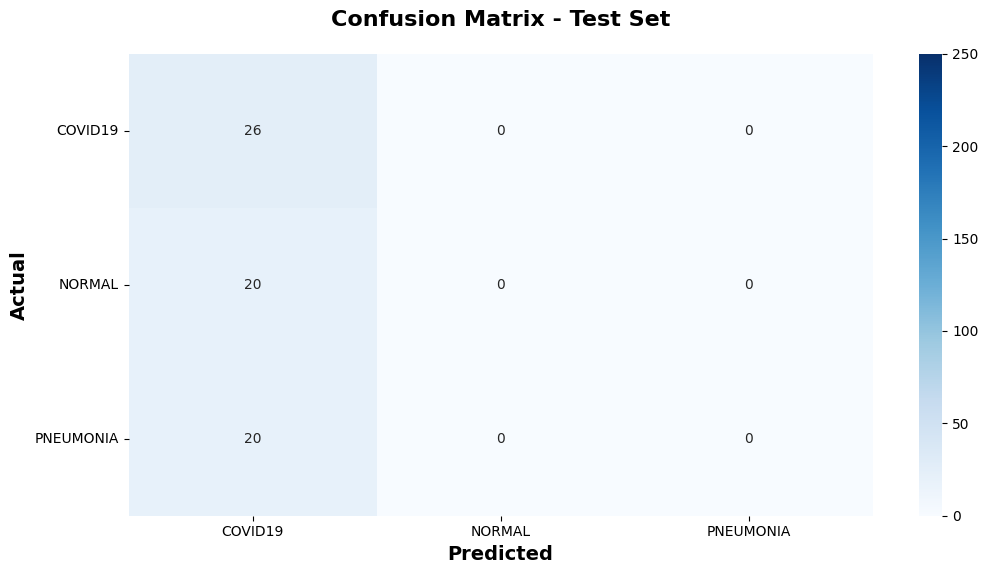

In [129]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


classes = ["COVID19", "NORMAL", "PNEUMONIA"]

y_pred = model.predict(test_set)
predictions = np.array(list(map(lambda x: np.argmax(x), y_pred)))

y_true=test_set.classes

CMatrix = pd.DataFrame(confusion_matrix(y_true, predictions), columns=classes, index =classes)

plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 250,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold')

ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

In [130]:
print(classification_report(y_true, predictions))

              precision    recall  f1-score   support

           0       0.39      1.00      0.57        26
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20

    accuracy                           0.39        66
   macro avg       0.13      0.33      0.19        66
weighted avg       0.16      0.39      0.22        66



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [131]:
class_dict = {0:'COVID19',
              1:'NORMAL',
              2:'PNEUMONIA'}

In [132]:
# predit test data

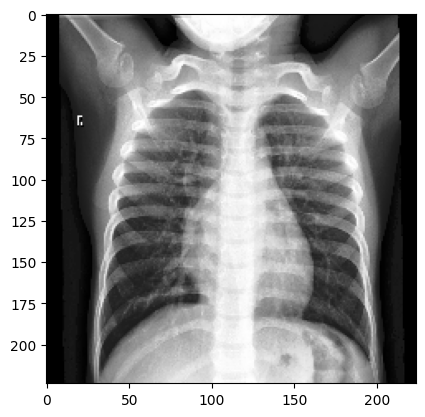

In [133]:
file_path = '/content/drive/MyDrive/COVID-19 Chest Xray/test data/normal/0121.jpeg'
test_image = cv2.imread(file_path)


test_image = cv2.resize(test_image, (224, 224), interpolation=cv2.INTER_NEAREST)
import matplotlib.pyplot as plt
plt.imshow(test_image)
plt.show()


test_image = np.expand_dims(test_image, axis=0)

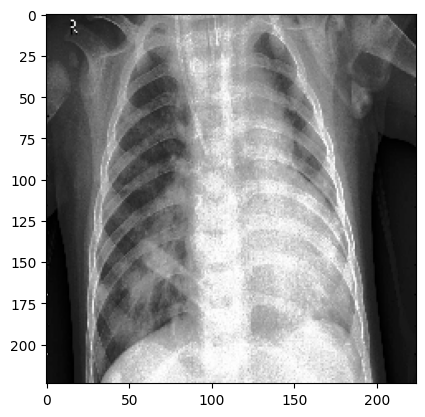

1/1 [==============================] - 0s 341ms/step


In [134]:
file_path = '/content/drive/MyDrive/COVID-19 Chest Xray/test data/viral Pneumonia/0110.jpeg'
test_image = cv2.imread(file_path)

test_image = cv2.resize(test_image, (224, 224), interpolation=cv2.INTER_NEAREST)

import matplotlib.pyplot as plt
plt.imshow(test_image)
plt.show()

test_image = np.expand_dims(test_image, axis=0)

# Making Predictions
probs = model.predict(test_image)

# Assuming class_dict is defined, we can obtain the predicted class index
pred_class_index = np.argmax(probs)


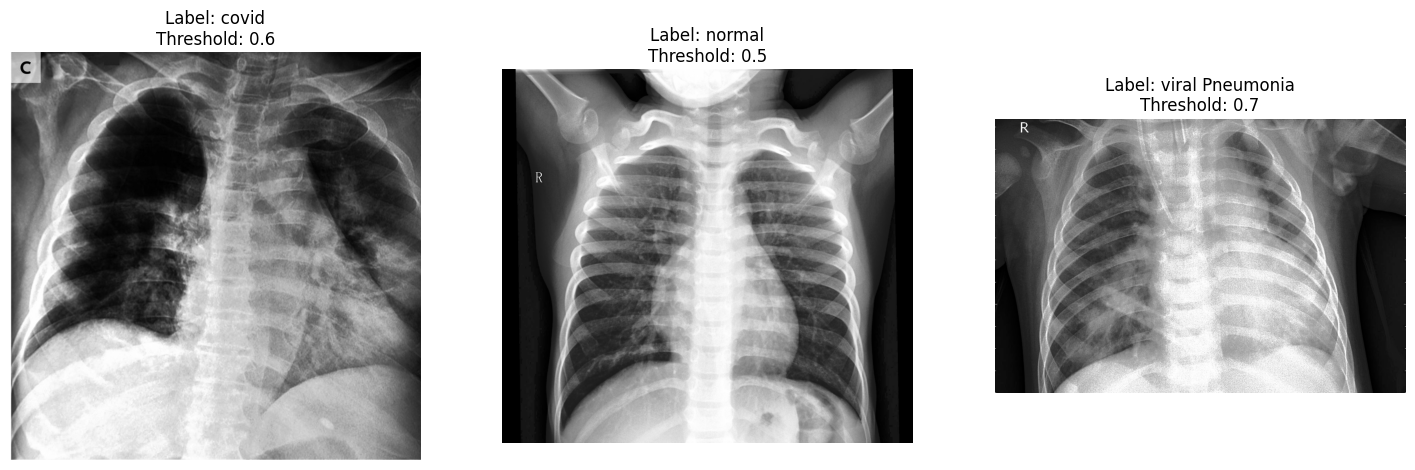

In [135]:
def visualize (image_path,ax,threshold,Data_path):
  image =mpimg.imread(image_path)
  ax.imshow(image)
  ax.axis("off")
  image_label=image_path.split("/")[-2]
  ax.set_title(f'Label: {image_label}\nThreshold: {threshold}')
  return None

fig,ax=plt.subplots(1,3,figsize=(18,6))

visualize('/content/drive/MyDrive/COVID-19 Chest Xray/test data/covid/0106.jpeg', ax[0], 0.6, Data_path)
visualize('/content/drive/MyDrive/COVID-19 Chest Xray/test data/normal/0121.jpeg', ax[1], 0.5, Data_path)
visualize('/content/drive/MyDrive/COVID-19 Chest Xray/test data/viral Pneumonia/0110.jpeg', ax[2], 0.7, Data_path)

plt.show()